In [5]:
import os
import numpy as np
import pandas as pd

import seaborn as sns
##high-level data visualization library in Python.
import plotly.express as px 
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
##Pipeline class is used to streamline the process of building machine learning workflows.
from sklearn.pipeline import Pipeline
## is a technique for dimensionality reduction that is particularly well suited for the visualization of high-dimensional datasets
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.metrics import euclidean_distances
## It computes pairwise distances between two sets of observation vectors.
from scipy.spatial.distance import cdist

In [6]:
genre_data = pd.read_csv('/Users/krishna/Desktop/ecs171/group_project/data_by_genres.csv')
data_by_artist = pd.read_csv('/Users/krishna/Desktop/ecs171/group_project/data_by_artist.csv')

In [7]:
print(genre_data.info())
print(data_by_artist.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2973 entries, 0 to 2972
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   mode              2973 non-null   int64  
 1   genres            2973 non-null   object 
 2   acousticness      2973 non-null   float64
 3   danceability      2973 non-null   float64
 4   duration_ms       2973 non-null   float64
 5   energy            2973 non-null   float64
 6   instrumentalness  2973 non-null   float64
 7   liveness          2973 non-null   float64
 8   loudness          2973 non-null   float64
 9   speechiness       2973 non-null   float64
 10  tempo             2973 non-null   float64
 11  valence           2973 non-null   float64
 12  popularity        2973 non-null   float64
 13  key               2973 non-null   int64  
dtypes: float64(11), int64(2), object(1)
memory usage: 325.3+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28680 entries, 0 to 2

acousticness        float64
danceability        float64
duration_ms         float64
energy              float64
instrumentalness    float64
liveness            float64
loudness            float64
speechiness         float64
tempo               float64
valence             float64
popularity          float64
key                   int64
dtype: object


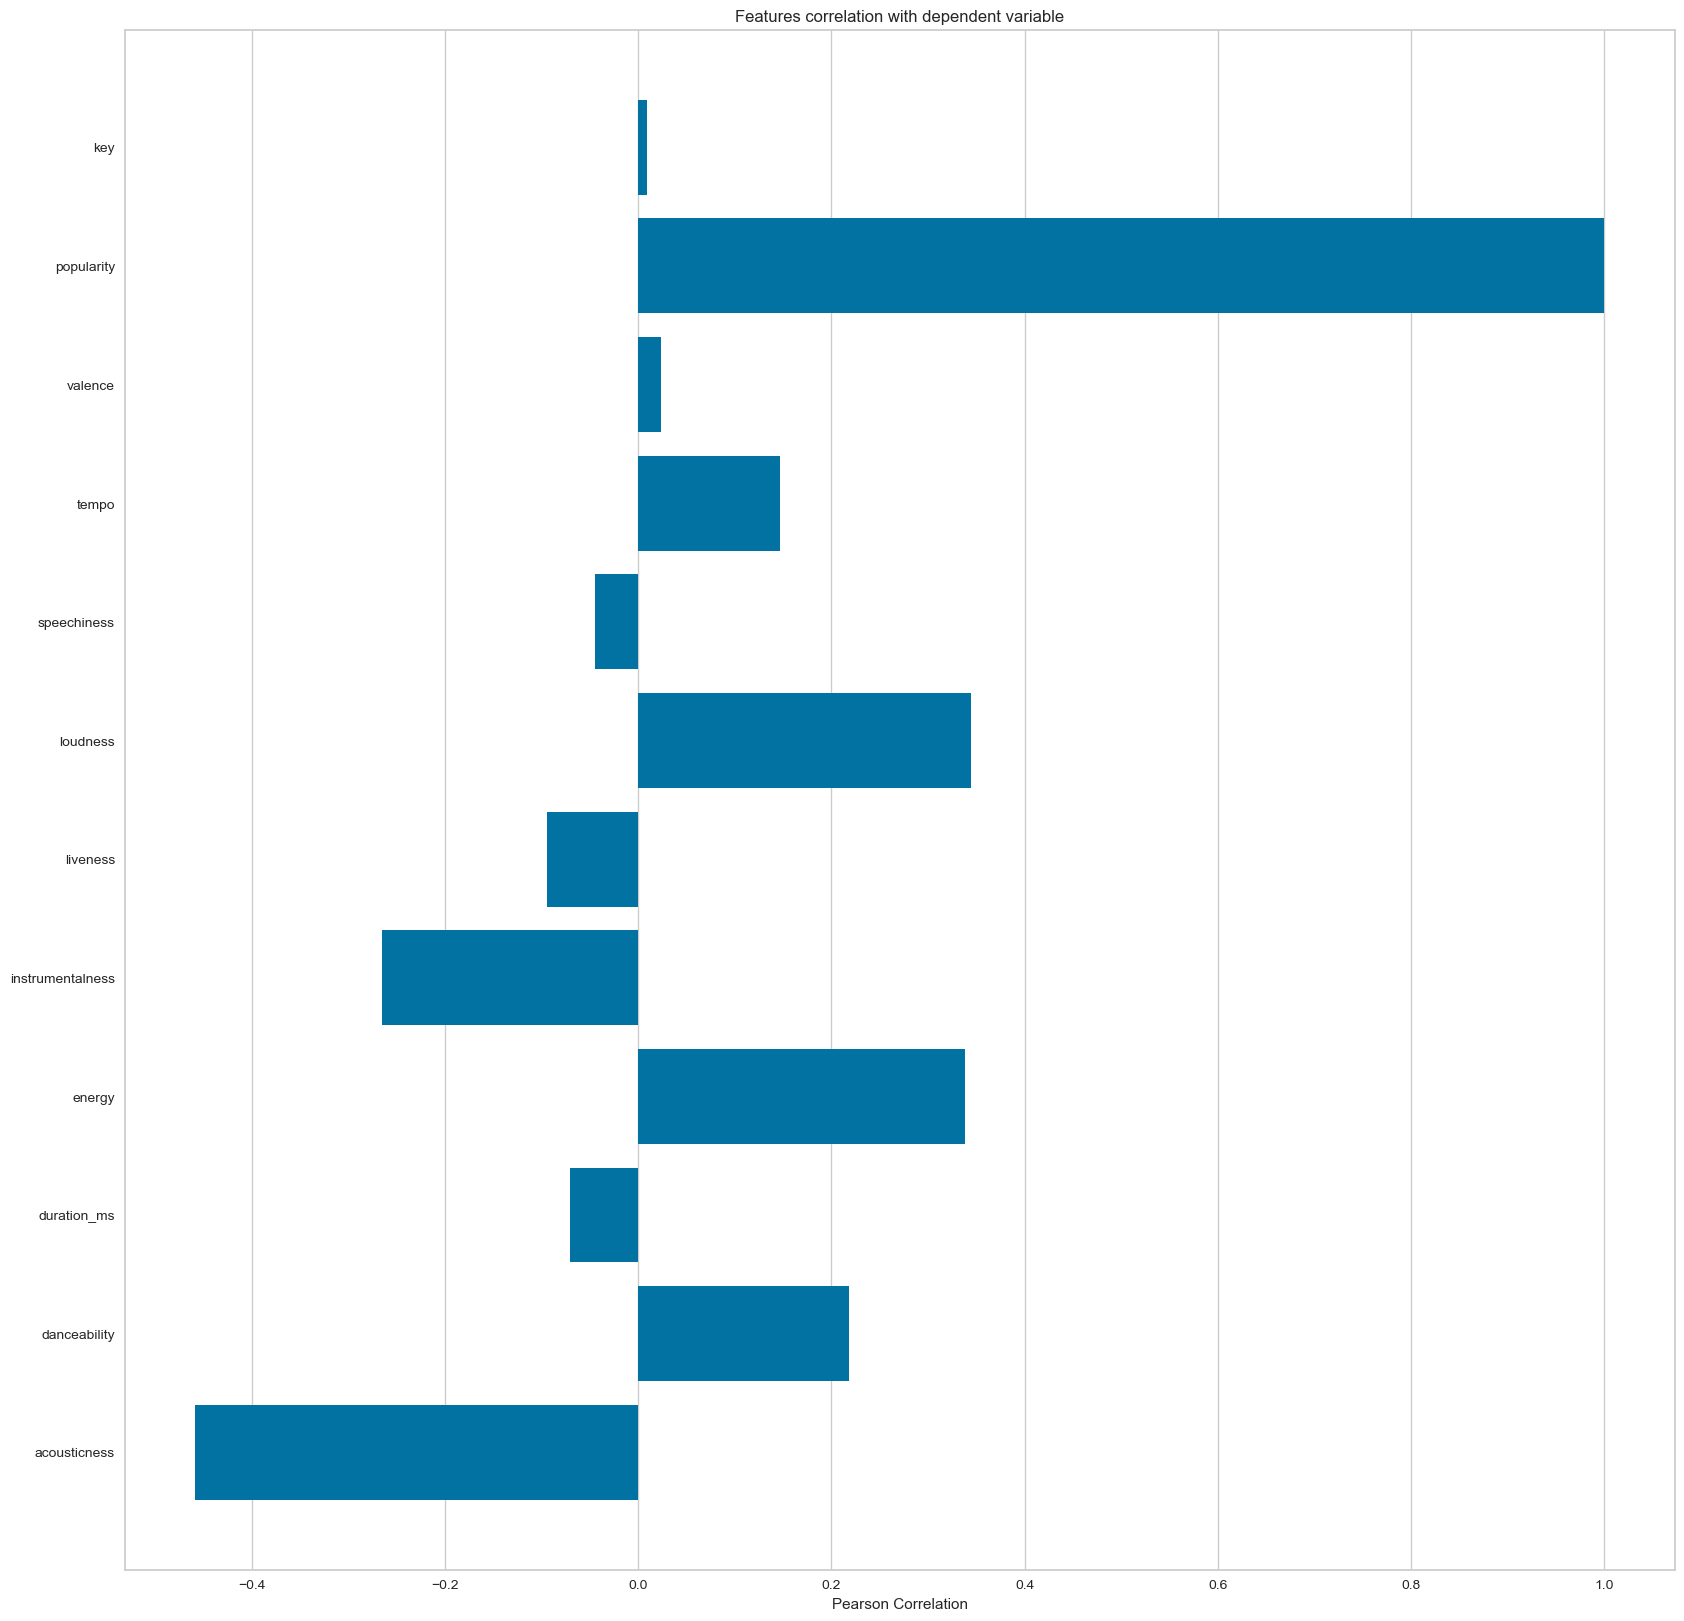

<Axes: title={'center': 'Features correlation with dependent variable'}, xlabel='Pearson Correlation'>

In [8]:
##comparing the all the features in genre data set with the target = population

from yellowbrick.target import FeatureCorrelation

feature_names = ["acousticness","danceability","duration_ms","energy","instrumentalness","liveness","loudness","speechiness","tempo","valence","popularity","key"]
X, y = genre_data[feature_names], genre_data['popularity']
print(genre_data[feature_names].dtypes)
# Create a list of the feature names
features = np.array(feature_names)

# Instantiate the visualizer
visualizer = FeatureCorrelation(labels=features)

plt.rcParams['figure.figsize']=(20,20)
visualizer.fit(X, y)     # Fit the data to the visualizer
visualizer.show()

acousticness        float64
danceability        float64
duration_ms         float64
energy              float64
instrumentalness    float64
liveness            float64
loudness            float64
speechiness         float64
tempo               float64
valence             float64
popularity          float64
key                   int64
dtype: object


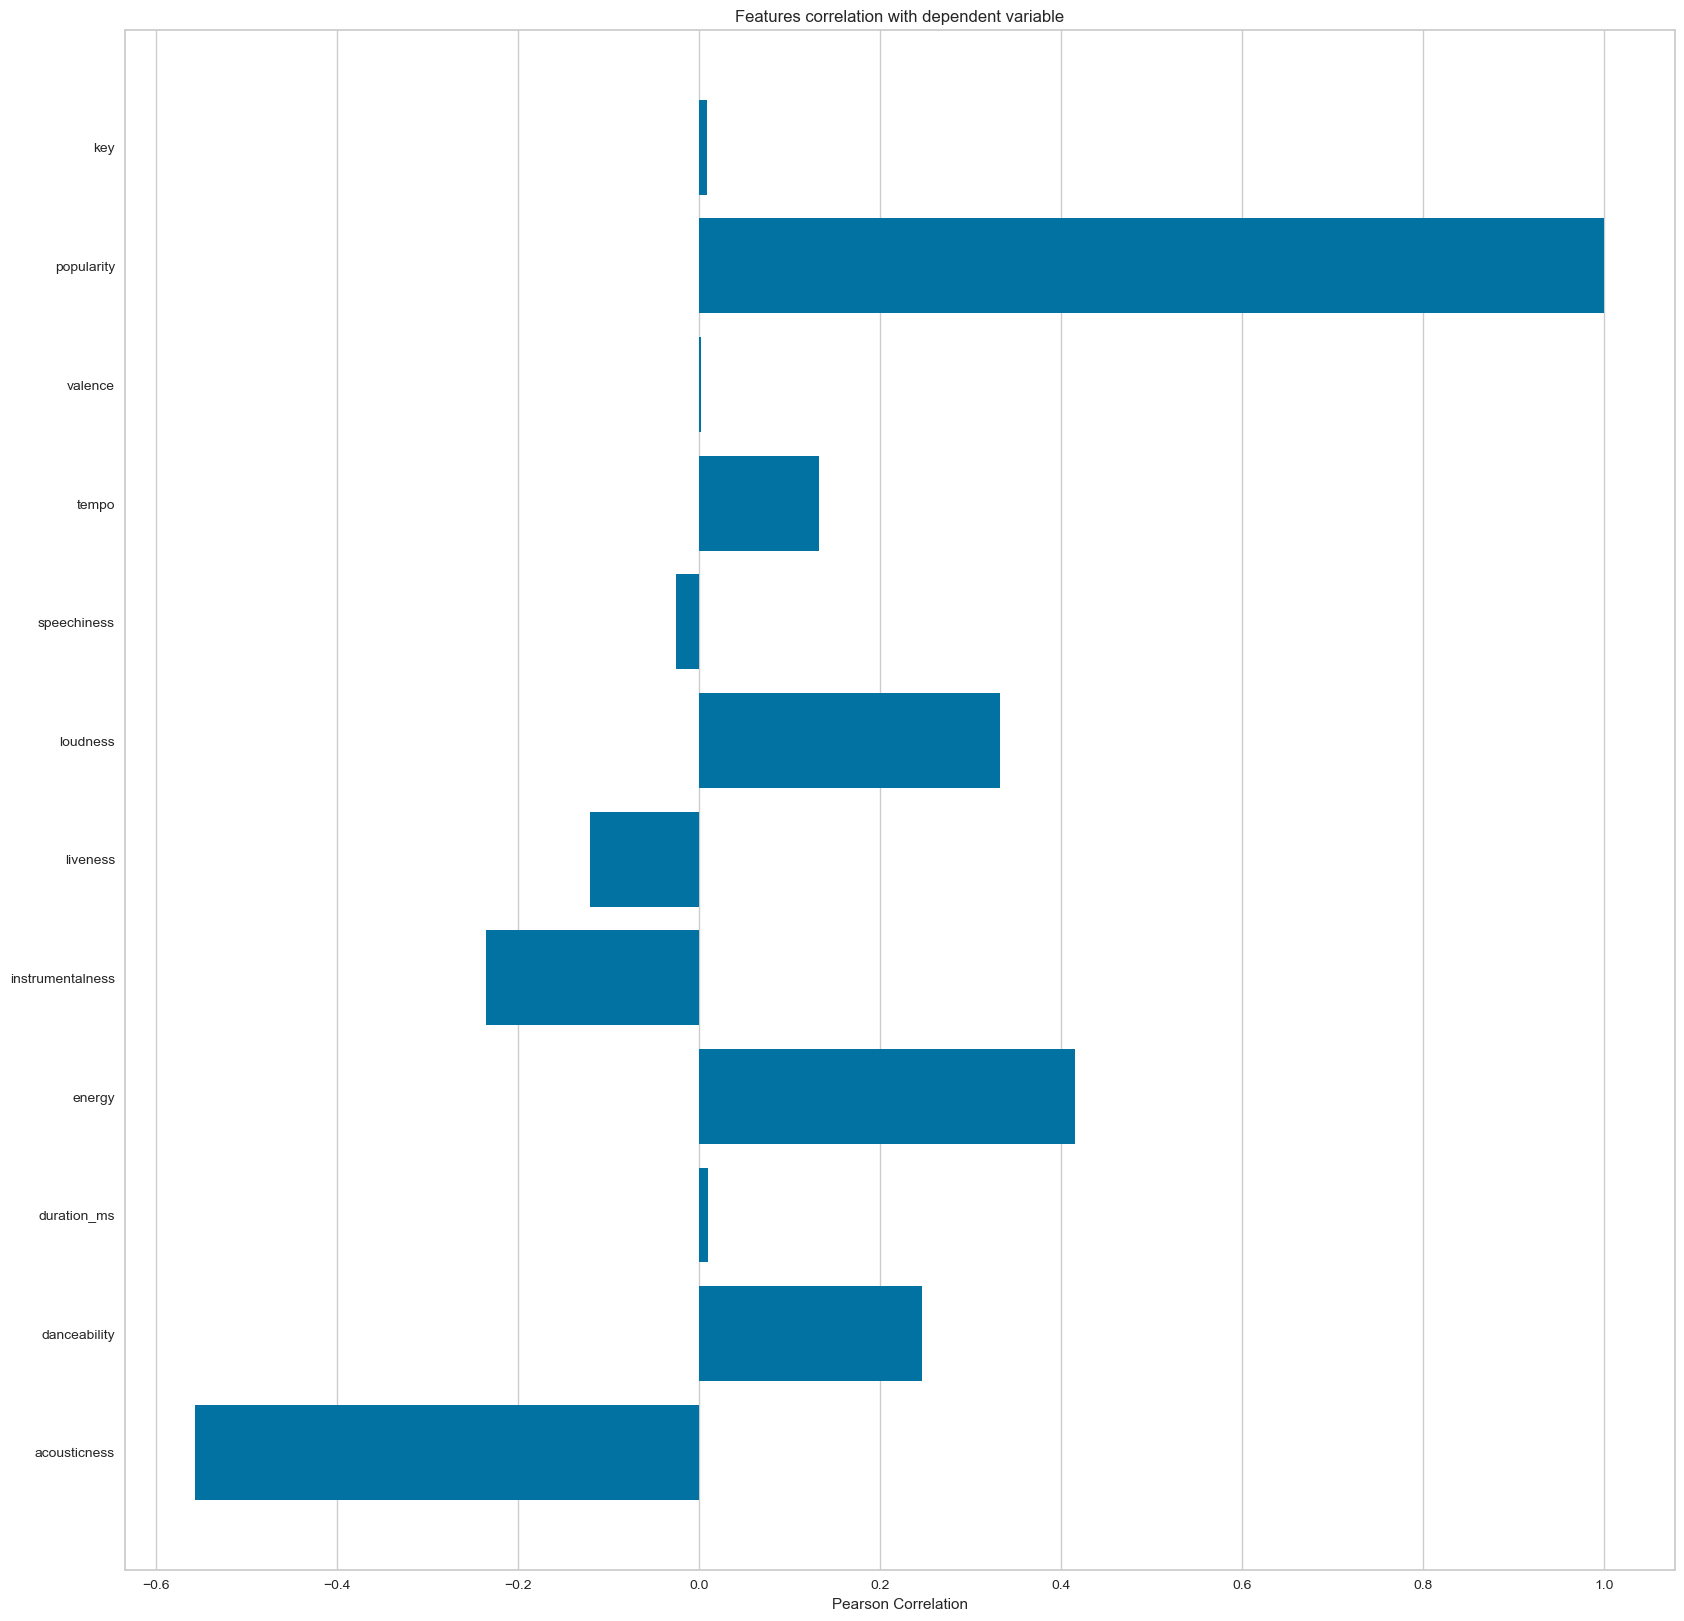

<Axes: title={'center': 'Features correlation with dependent variable'}, xlabel='Pearson Correlation'>

In [9]:
##comparing the all the features in artist data set with the target = population

from yellowbrick.target import FeatureCorrelation

feature_names = ["acousticness","danceability","duration_ms","energy","instrumentalness","liveness","loudness","speechiness","tempo","valence","popularity","key"]
X, y = data_by_artist[feature_names], data_by_artist['popularity']
print(genre_data[feature_names].dtypes)
# Create a list of the feature names
features = np.array(feature_names)

# Instantiate the visualizer
visualizer = FeatureCorrelation(labels=features)

plt.rcParams['figure.figsize']=(20,20)
visualizer.fit(X, y)     # Fit the data to the visualizer
visualizer.show()

In [10]:
##applying KNN

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

cluster_pipeline = Pipeline([('scaler', StandardScaler()), ('kmeans', KMeans(n_clusters=10))])
X = genre_data.select_dtypes(np.number)
cluster_pipeline.fit(X)
genre_data['cluster'] = cluster_pipeline.predict(X)

/Users/krishna/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [11]:
##visualizing the KNN cluster
from sklearn.manifold import TSNE

tsne_pipeline = Pipeline([('scaler', StandardScaler()), ('tsne', TSNE(n_components=2, verbose=1))])
genre_embedding = tsne_pipeline.fit_transform(X)
projection = pd.DataFrame(columns=['x', 'y'], data=genre_embedding)
projection['genres'] = genre_data['genres']
projection['cluster'] = genre_data['cluster']

fig = px.scatter(
    projection, x='x', y='y', color='cluster', hover_data=['x', 'y', 'genres'])
fig.show()

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 2973 samples in 0.004s...
[t-SNE] Computed neighbors for 2973 samples in 0.202s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2973
[t-SNE] Computed conditional probabilities for sample 2000 / 2973
[t-SNE] Computed conditional probabilities for sample 2973 / 2973
[t-SNE] Mean sigma: 0.777516
[t-SNE] KL divergence after 250 iterations with early exaggeration: 76.106056
[t-SNE] KL divergence after 1000 iterations: 1.393463


In [12]:
song_cluster_pipeline = Pipeline([('scaler', StandardScaler()), 
                                  ('kmeans', KMeans(n_clusters=20, 
                                   verbose=False))
                                 ], verbose=False)

X = genre_data.select_dtypes(np.number)
print(X)
number_cols = list(X.columns)
song_cluster_pipeline.fit(X)
song_cluster_labels = song_cluster_pipeline.predict(X)
genre_data['cluster_label'] = song_cluster_labels

      mode  acousticness  danceability   duration_ms    energy  \
0        1      0.979333      0.162883  1.602977e+05  0.071317   
1        1      0.494780      0.299333  1.048887e+06  0.450678   
2        1      0.762000      0.712000  1.151770e+05  0.818000   
3        1      0.651417      0.529093  2.328809e+05  0.419146   
4        1      0.676557      0.538961  1.906285e+05  0.316434   
...    ...           ...           ...           ...       ...   
2968     1      0.222625      0.547082  2.580991e+05  0.610240   
2969     0      0.161000      0.863000  2.063200e+05  0.909000   
2970     1      0.263261      0.748889  3.060728e+05  0.622444   
2971     0      0.993000      0.705667  1.984173e+05  0.172667   
2972     1      0.421038      0.629409  1.716717e+05  0.609369   

      instrumentalness  liveness   loudness  speechiness       tempo  \
0             0.606834  0.361600 -31.514333     0.040567   75.336500   
1             0.477762  0.131000 -16.854000     0.076817  120.2

/Users/krishna/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [13]:
# Visualizing the Clusters with PCA

from sklearn.decomposition import PCA

pca_pipeline = Pipeline([('scaler', StandardScaler()), ('PCA', PCA(n_components=2))])
song_embedding = pca_pipeline.fit_transform(X)
projection = pd.DataFrame(columns=['x', 'y'], data=song_embedding)
projection['title'] = genre_data['acousticness']
projection['cluster'] = genre_data['cluster_label']

fig = px.scatter(
    projection, x='x', y='y', color='cluster', hover_data=['x', 'y', 'title'])
fig.show()

In [14]:
pip install spotipy

Note: you may need to restart the kernel to use updated packages.


In [ ]:
from collections import defaultdict
from sklearn.metrics import euclidean_distances
from scipy.spatial.distance import cdist
import difflib

number_cols = ['valence', 'year', 'acousticness', 'danceability', 'duration_ms', 'energy', 'explicit',
 'instrumentalness', 'key', 'liveness', 'loudness', 'mode', 'popularity', 'speechiness', 'tempo']


def get_song_data(song, spotify_data):
    
    try:
        song_data = spotify_data[(spotify_data['name'] == song['name']) 
                                & (spotify_data['year'] == song['year'])].iloc[0]
        return song_data
    
    except IndexError:
        return find_song(song['name'], song['year'])
        

def get_mean_vector(song_list, spotify_data):
    
    song_vectors = []
    
    for song in song_list:
        song_data = get_song_data(song, spotify_data)
        if song_data is None:
            print('Warning: {} does not exist in Spotify or in database'.format(song['name']))
            continue
        song_vector = song_data[number_cols].values
        song_vectors.append(song_vector)  
    
    song_matrix = np.array(list(song_vectors))
    return np.mean(song_matrix, axis=0)


def flatten_dict_list(dict_list):
    
    flattened_dict = defaultdict()
    for key in dict_list[0].keys():
        flattened_dict[key] = []
    
    for dictionary in dict_list:
        for key, value in dictionary.items():
            flattened_dict[key].append(value)
            
    return flattened_dict


def recommend_songs( song_list, spotify_data, n_songs=10):
    
    metadata_cols = ['name', 'year', 'artists']
    song_dict = flatten_dict_list(song_list)
    
    song_center = get_mean_vector(song_list, spotify_data)
    scaler = song_cluster_pipeline.steps[0][1]
    scaled_data = scaler.transform(spotify_data[number_cols])
    scaled_song_center = scaler.transform(song_center.reshape(1, -1))
    distances = cdist(scaled_song_center, scaled_data, 'cosine')
    index = list(np.argsort(distances)[:, :n_songs][0])
    
    rec_songs = spotify_data.iloc[index]
    rec_songs = rec_songs[~rec_songs['name'].isin(song_dict['name'])]
    return rec_songs[metadata_cols].to_dict(orient='records')

In [21]:
# from flask import Flask, request, jsonify,render_template
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
from collections import defaultdict
from sklearn.metrics import euclidean_distances
from scipy.spatial.distance import cdist
import numpy as np
import pandas as pd
import os
from sklearn.cluster import KMeans
from sklearn.metrics import euclidean_distances
import difflib
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler




data = pd.read_csv("/Users/krishna/Desktop/ecs171/group_project/data.csv")
# Set up the song clustering pipeline
song_cluster_pipeline = Pipeline([
    ('scaler', StandardScaler()), 
    ('kmeans', KMeans(n_clusters=20, verbose=False, n_init=10))
])
X = data.select_dtypes(np.number)
number_cols = list(X.columns)
song_cluster_pipeline.fit(X)
song_cluster_labels = song_cluster_pipeline.predict(X)
data['cluster_label'] = song_cluster_labels

sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id="6a8146dae2da400daa1f9dcbf1e58a3c",
                                                           client_secret="4b4d40f840944fea9354e28d3f3e88af"))

def find_song(name, year):
    song_data = defaultdict()
    results = sp.search(q= 'track: {} year: {}'.format(name,year), limit=1)
    if results['tracks']['items'] == []:
        return None

    results = results['tracks']['items'][0]
    track_id = results['id']
    audio_features = sp.audio_features(track_id)[0]

    song_data['name'] = [name]
    song_data['year'] = [year]
    song_data['explicit'] = [int(results['explicit'])]
    song_data['duration_ms'] = [results['duration_ms']]
    song_data['popularity'] = [results['popularity']]

    for key, value in audio_features.items():
        song_data[key] = value

    return pd.DataFrame(song_data)



number_cols = ['valence', 'year', 'acousticness', 'danceability', 'duration_ms', 'energy', 'explicit',
 'instrumentalness', 'key', 'liveness', 'loudness', 'mode', 'popularity', 'speechiness', 'tempo']


def get_song_data(song, spotify_data):
    
    try:
        song_data = spotify_data[(spotify_data['name'] == song['name']) 
                                & (spotify_data['year'] == song['year'])].iloc[0]
        return song_data
    
    except IndexError:
        return find_song(song['name'], song['year'])
        

# def get_mean_vector(song_list, spotify_data):
    
#     song_vectors = []
    
#     for song in song_list:
#         song_data = get_song_data(song, spotify_data)
#         if song_data is None:
#             print('Warning: {} does not exist in Spotify or in database'.format(song['name']))
#             continue
#         song_vector = song_data[number_cols].values
#         song_vectors.append(song_vector)  
    
#     song_matrix = np.array(list(song_vectors))
#     return np.mean(song_matrix, axis=0)


def get_mean_vector(song_list, spotify_data):
    song_vectors = []

    for song in song_list:
        song_data = get_song_data(song, spotify_data)
        if song_data is None:
            print('Warning: {} does not exist in Spotify or in database'.format(song['name']))
            continue
        song_vector = song_data[number_cols].values
        print(f"Song vector for '{song['name']}': {song_vector}")  # Debug print
        song_vectors.append(song_vector)

    print("All song vectors:", song_vectors)  # Debug print

    # Check if all vectors have the same length
    vector_lengths = [len(vector) for vector in song_vectors]
    print("Lengths of song vectors:", vector_lengths)  # Debug print

    if len(set(vector_lengths)) > 1:
        raise ValueError("Inconsistent song vector lengths: {}".format(vector_lengths))

    song_matrix = np.array(song_vectors)
    return np.mean(song_matrix, axis=0)



def flatten_dict_list(dict_list):
    
    flattened_dict = defaultdict()
    for key in dict_list[0].keys():
        flattened_dict[key] = []
    
    for dictionary in dict_list:
        for key, value in dictionary.items():
            flattened_dict[key].append(value)
            
    return flattened_dict




def recommend_songs( song_list, spotify_data, n_songs=10):
    
    metadata_cols = ['name', 'year', 'artists']
    song_dict = flatten_dict_list(song_list)
    
    song_center = get_mean_vector(song_list, spotify_data)
    scaler = song_cluster_pipeline.steps[0][1]
    scaled_data = scaler.transform(spotify_data[number_cols])
    scaled_song_center = scaler.transform(song_center.reshape(1, -1))
    distances = cdist(scaled_song_center, scaled_data, 'cosine')
    index = list(np.argsort(distances)[:, :n_songs][0])
    
    rec_songs = spotify_data.iloc[index]
    rec_songs = rec_songs[~rec_songs['name'].isin(song_dict['name'])]
    return rec_songs[metadata_cols].to_dict(orient='records')


In [24]:

recommend_songs([{'name': 'Shape of You', 'year':2017}],  data)

Song vector for 'Shape of You': [0.931 2017 0.581 0.825 233713 0.652 0 0.0 1 0.0931 -3.1830000000000003 0
 85 0.0802 95.977]
All song vectors: [array([0.931, 2017, 0.581, 0.825, 233713, 0.652, 0, 0.0, 1, 0.0931,
       -3.1830000000000003, 0, 85, 0.0802, 95.977], dtype=object)]
Lengths of song vectors: [15]


/Users/krishna/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



[{'name': 'On the Low', 'year': 2019, 'artists': "['Burna Boy']"},
 {'name': 'El Efecto',
  'year': 2019,
  'artists': "['Rauw Alejandro', 'Chencho Corleone']"},
 {'name': 'Because Of You', 'year': 2007, 'artists': "['Ne-Yo']"},
 {'name': 'Nunca Es Suficiente',
  'year': 2018,
  'artists': "['Los Ángeles Azules', 'Natalia Lafourcade']"},
 {'name': "Baby I'm Yours", 'year': 2012, 'artists': "['Breakbot', 'Irfane']"},
 {'name': 'Métele Sazón',
  'year': 2003,
  'artists': "['Luny Tunes', 'Noriega', 'Tego Calderon']"},
 {'name': 'How Long', 'year': 2018, 'artists': "['Charlie Puth']"},
 {'name': 'El Buho', 'year': 2019, 'artists': "['Luis R Conriquez']"}]